# Supervised Learning: Predicting video games user review scores

## Table of contents

<!-- Hello World -->

1. [Introduction](#Introduction)
2. [Libraries needed](#Libraries-needed)
3. [Checking the Data](#Checking-the-Data)
4. [Tidying the Data](#Tidying-the-Data)
5. [Exploratory analysis](#Exploratory-analysis)
6. [Classification](#Classification) 
    - [1º Attempt](#1º-Attempt) 
    
    - [2º Attempt](#2º-Attempt)   
     
    - [3º Attempt](#3º-Attempt)        
        
    - [Tuning the parameters](#Tuning-the-parameters)
        
7. [Percentage Comparison](#Percentage-Comparison)

8. [Reproducibility](#Reproducibility)

9. [Conclusion](#Conclusion)

## Introduction
[[ go back to the top ]](#Table-of-contents)

Nowadays there is an enormous quantity of data being transfered and stored all the time everywhere. So we needed to came up with a way to organize everything.

In this notebook, our goal is to process the data made available by the UC professor, the Python language, made available by the UC professor, in order to answer a problem question that will be formulated more ahead at work.

<!-- Time it takes to run everything: x min.(substituir no fim) -->

## Libraries needed
[[ go back to the top ]](#Table-of-contents)

In [7]:
import pandas as pd # Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
import numpy as np  #  Provides a fast numerical array structure and helper functions.
import seaborn as sns # Advanced statistical plotting library.
import matplotlib.pyplot as plt # Basic plotting library in Python.
from sklearn.preprocessing import LabelEncoder     #  \
from sklearn.model_selection import train_test_split # \
from sklearn.tree import DecisionTreeClassifier #       - The essential Machine Learning package in Python.
from sklearn import metrics,datasets, neighbors  #                         /
from sklearn.model_selection import cross_val_score # /
from graphviz import Source
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV



## Checking the Data
[[ go back to the top ]](#Table-of-contents)

In [8]:
df = pd.read_csv("video_games.csv", sep =",")

In [9]:
df.head()

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,user_score,user_rating,n_user_reviews,summary
0,1020,Grand Theft Auto V,main_game,0,0,2013,1766,True,"Shooter, Adventure","Rockstar North, Rockstar Games, Take-Two Inter...","PC (Microsoft Windows), PlayStation 3, Xbox 36...",90.202388,great,3369,Grand Theft Auto V is a vast open world game s...
1,1942,The Witcher 3: Wild Hunt,main_game,4,2,2015,1516,True,"Role-playing (RPG), Adventure","WB Games, Bandai Namco Entertainment, cdp.pl, ...","PC (Microsoft Windows), PlayStation 4, Xbox On...",95.169577,great,2997,"RPG and sequel to The Witcher 2 (2011), The Wi..."
2,472,The Elder Scrolls V: Skyrim,main_game,3,0,2011,1046,False,"Role-playing (RPG), Adventure","Bethesda Game Studios, Bethesda Softworks","PC (Microsoft Windows), PlayStation 3, Xbox 360",87.508504,great,2567,Skyrim reimagines and revolutionizes the open-...
3,72,Portal 2,main_game,3,0,2011,963,True,"Shooter, Platform, Puzzle, Adventure","Valve Corporation, Electronic Arts","Linux, PC (Microsoft Windows), PlayStation 3, ...",91.650705,great,2544,"Sequel to the acclaimed Portal (2007), Portal ..."
4,71,Portal,main_game,0,0,2007,894,True,"Shooter, Platform, Puzzle","Valve Corporation, EA","Linux, PC (Microsoft Windows), PlayStation 3, ...",86.931758,great,2297,"Waking up in a seemingly empty laboratory, the..."


In [10]:
df.describe()

,id,n_dlcs,n_expansions,year,follows,user_score,n_user_reviews
count,5824.000000,5824.000000,5824.000000,5824.000000,5824.000000,5824.000000,5824.000000
mean,18508.000515,0.450721,0.120707,2007.293784,35.428056,75.115510,86.186470
std,30546.018723,2.150920,0.811236,9.342881,85.026280,10.197815,194.781917
min,1.000000,0.000000,0.000000,1971.000000,0.000000,10.266748,11.000000
25%,2271.750000,0.000000,0.000000,2001.000000,5.000000,69.937370,16.000000
50%,7258.000000,0.000000,0.000000,2009.000000,11.000000,76.258903,28.000000
75%,18581.250000,0.000000,0.000000,2015.000000,28.000000,81.695739,67.000000
max,178351.000000,44.000000,29.000000,2022.000000,1766.000000,99.738172,3369.000000


## Tidying the Data
[[ go back to the top ]](#Table-of-contents)

Now we are gonna take some columns off the dataset so we can analize it better.

In [11]:
df.drop('summary', axis=1, inplace=True)
df.drop('user_score', axis=1, inplace=True)

In [12]:
df.isnull().sum()

id                 0
name               0
category           0
n_dlcs             0
n_expansions       0
year               0
follows            0
in_franchise       0
genres            21
companies         43
platforms          0
user_rating        0
n_user_reviews     0
dtype: int64

In [13]:
df=df.dropna()

In [14]:
df=df.reset_index(drop=True)

In [15]:
df.head()

,id,name,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,user_rating,n_user_reviews
0,1020,Grand Theft Auto V,main_game,0,0,2013,1766,True,"Shooter, Adventure","Rockstar North, Rockstar Games, Take-Two Inter...","PC (Microsoft Windows), PlayStation 3, Xbox 36...",great,3369
1,1942,The Witcher 3: Wild Hunt,main_game,4,2,2015,1516,True,"Role-playing (RPG), Adventure","WB Games, Bandai Namco Entertainment, cdp.pl, ...","PC (Microsoft Windows), PlayStation 4, Xbox On...",great,2997
2,472,The Elder Scrolls V: Skyrim,main_game,3,0,2011,1046,False,"Role-playing (RPG), Adventure","Bethesda Game Studios, Bethesda Softworks","PC (Microsoft Windows), PlayStation 3, Xbox 360",great,2567
3,72,Portal 2,main_game,3,0,2011,963,True,"Shooter, Platform, Puzzle, Adventure","Valve Corporation, Electronic Arts","Linux, PC (Microsoft Windows), PlayStation 3, ...",great,2544
4,71,Portal,main_game,0,0,2007,894,True,"Shooter, Platform, Puzzle","Valve Corporation, EA","Linux, PC (Microsoft Windows), PlayStation 3, ...",great,2297


## Exploratory analysis
[[ go back to the top ]](#Table-of-contents)

''

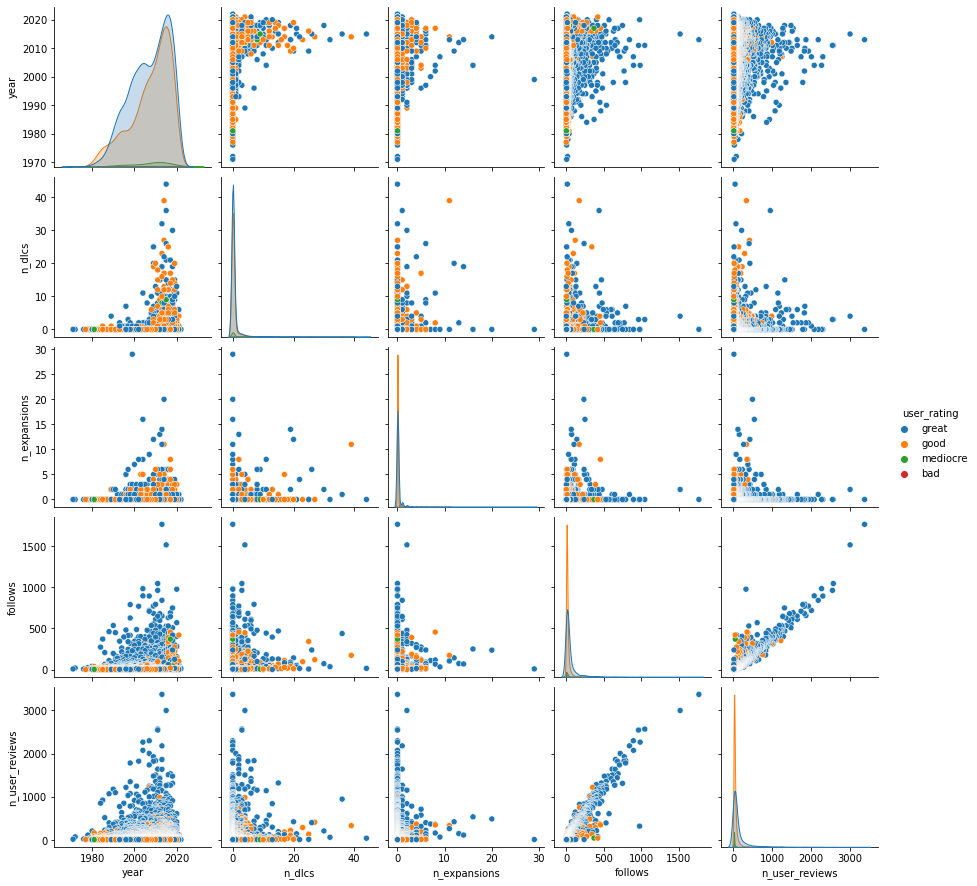

In [16]:
sns.pairplot(df[['year','n_dlcs','n_expansions','follows','n_user_reviews','user_rating',]], hue='user_rating')
;

''

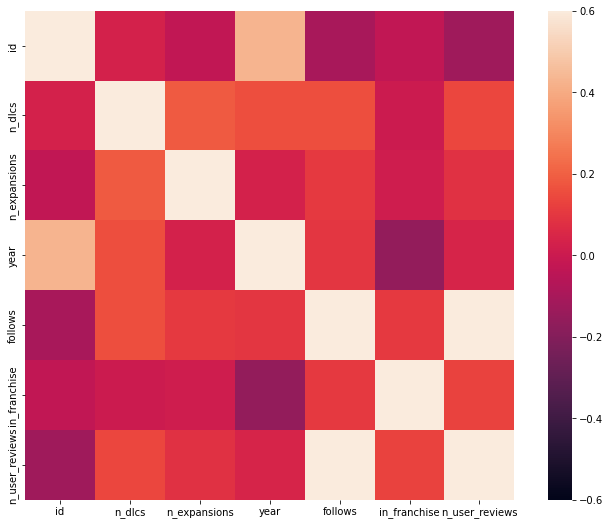

In [17]:
fig = plt.figure(figsize = (12,9))

sns.heatmap(df.corr(), vmax = .6,vmin =-.6, square = True)
plt.show
;

In [18]:
label_enc=LabelEncoder()
label_1=label_enc.fit_transform(df['category'])
label_2=df['n_dlcs']
label_3=df['n_expansions']
label_4=df['year']
label_5=df['follows']
label_6=label_enc.fit_transform(df['in_franchise'])
label_7=label_enc.fit_transform(df['genres'])
label_8=label_enc.fit_transform(df['companies'])
label_9=label_enc.fit_transform(df['platforms'])
label_10=label_enc.fit_transform(df['n_user_reviews'])
label_11=df['user_rating']
features=pd.DataFrame(list(zip(label_1,label_2,label_3,label_4,label_5,
                               label_6,label_7,label_8,label_9,label_10,label_11)),
                      columns=['category','n_dlcs','n_expansions','year','follows','in_franchise',
                               'genres','companies','platforms','n_user_reviews','user_rating'])

''

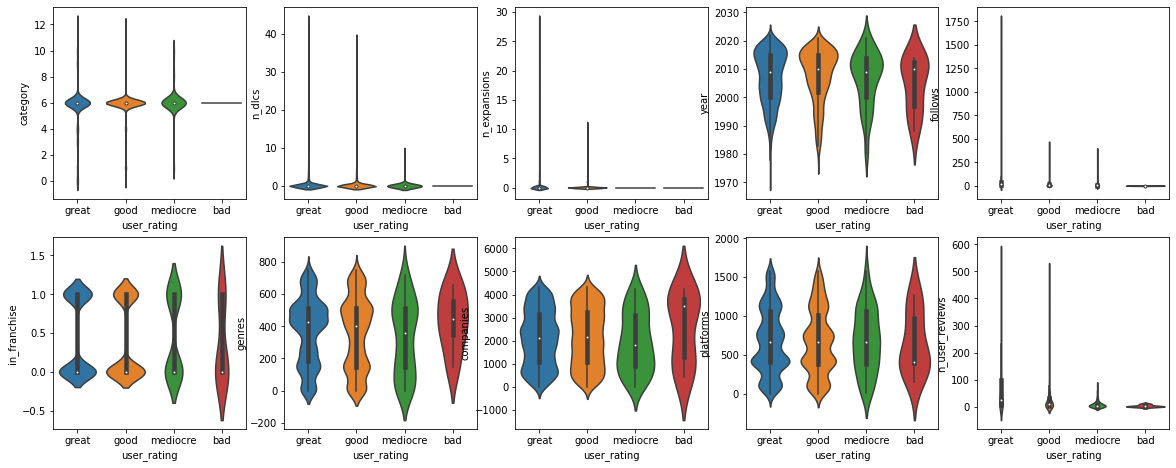

In [19]:
plt.figure(figsize=(20, 12))
for column_index, column in enumerate(features.columns):
    if column != 'user_rating':
        plt.subplot(3,5, column_index+1)
        sns.violinplot(x=label_11, y=column, data=features)
;

In [20]:
label_enc=LabelEncoder()
label_1=label_enc.fit_transform(df['category'])
label_2=df['year']
label_3=label_enc.fit_transform(df['in_franchise'])
label_4=label_enc.fit_transform(df['genres'])
label_5=label_enc.fit_transform(df['companies'])
label_6=label_enc.fit_transform(df['platforms'])
label_7=df['user_rating']
features=pd.DataFrame(list(zip(label_1,label_2,label_3,label_4,label_5,
                               label_6,label_7)),
                      columns=['category','year','in_franchise',
                               'genres','companies','platforms','user_rating'])

''

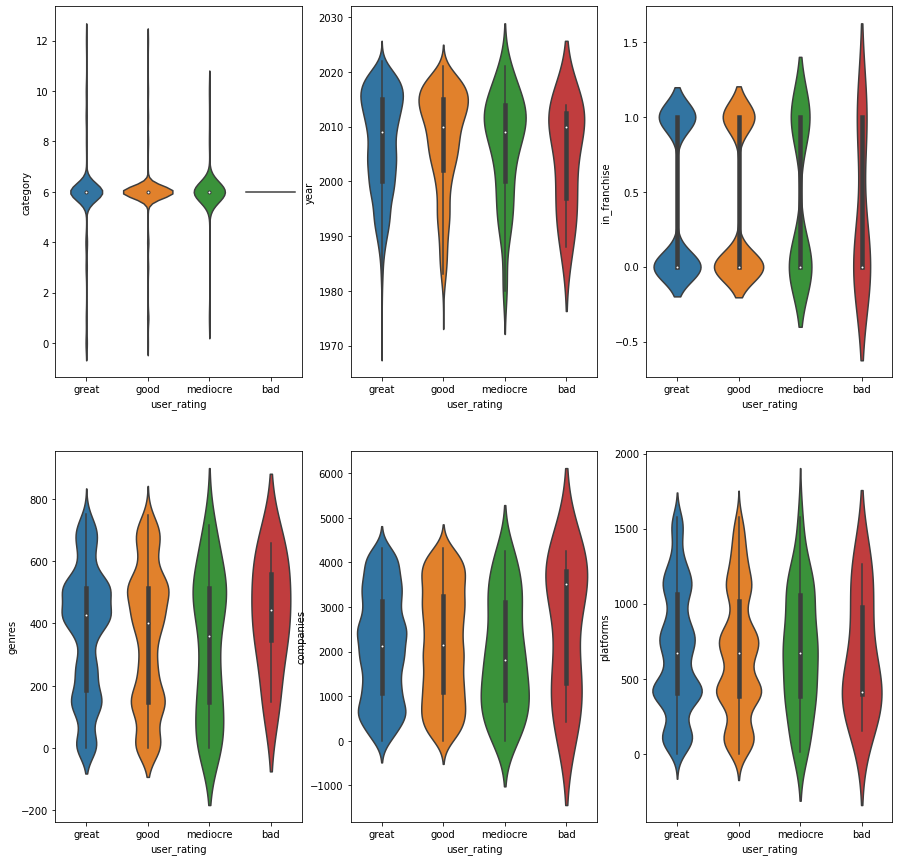

In [21]:
plt.figure(figsize=(15, 15))
for column_index, column in enumerate(features.columns):
    if column != 'user_rating':
        plt.subplot(2,3, column_index+1)
        sns.violinplot(x=label_7, y=column, data=features)
;

>  `real_stats` :

In [22]:
n_great=df['user_rating'].value_counts("")[0]
n_good=df['user_rating'].value_counts("")[1]
n_medium=df['user_rating'].value_counts("")[2]
n_bad=df['user_rating'].value_counts("")[3]

In [23]:
total=n_great+n_good+n_medium+n_bad
n_great_percent=round((100*n_great)/total, 2)
n_good_percent=round((100*n_good)/total, 2)
n_medium_percent=round((100*n_medium)/total, 2)
n_bad_percent=round((100*n_bad)/total, 2)

In [24]:
real_stats=pd.DataFrame( columns = ['','Number:','Percentage:'])
real_stats.at[0,''] = "Sum of    'great's:"
real_stats.at[1,''] = "Sum of    'good's:"
real_stats.at[2,''] = "Sum of    'medium's:"
real_stats.at[3,''] = "Sum of    'bad's:"
real_stats.at[0,'Number:'] = n_great
real_stats.at[1,'Number:'] = n_good
real_stats.at[2,'Number:'] = n_medium
real_stats.at[3,'Number:'] = n_bad
real_stats.at[0,'Percentage:'] = str(n_great_percent)+"%"
real_stats.at[1,'Percentage:'] = str(n_good_percent)+"%"
real_stats.at[2,'Percentage:'] = str(n_medium_percent)+"%"
real_stats.at[3,'Percentage:'] = str(n_bad_percent)+"%"

In [25]:
real_stats.style.hide_index()

C:\Users\guiva\AppData\Local\Temp\ipykernel_16132\676686127.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  real_stats.style.hide_index()


,Number:,Percentage:
Sum of 'great's:,3153,54.73%
Sum of 'good's:,2500,43.4%
Sum of 'medium's:,97,1.68%
Sum of 'bad's:,11,0.19%


## Classification
[[ go back to the top ]](#Table-of-contents)

### 1º Attempt
[[ go back to the top ]](#Table-of-contents)

##### Target

In [26]:
target=df[['user_rating']]

In [27]:
target.head()

,user_rating
0,great
1,great
2,great
3,great
4,great


##### Features

In [28]:
label_0=df['id']
label_1=df['n_dlcs']
label_2=df['n_expansions']
label_3=df['year']
label_4=df['follows']
label_5=df['n_user_reviews']

features=pd.DataFrame(list(zip(label_0,label_1,label_2,label_3,label_4,label_5)),
                      columns=['id','n_dlcs','n_expansions','year','follows','n_user_reviews'])


In [29]:
features.head()

,id,n_dlcs,n_expansions,year,follows,n_user_reviews
0,1020,0,0,2013,1766,3369
1,1942,4,2,2015,1516,2997
2,472,3,0,2011,1046,2567
3,72,3,0,2011,963,2544
4,71,0,0,2007,894,2297


>Here we inicialize `test_size` to use in the resto of the program:

In [30]:
test_size=0.15

In [31]:
features_train,features_test,target_train,target_test = train_test_split(features,
                                                                         target,
                                                                         test_size=test_size,
                                                                         random_state=42)

### Classifiers:

##### DecisionTreeClassifier

In [32]:
Tree=DecisionTreeClassifier(criterion='gini')

##### RandomForestClassifier

In [33]:
Forest=RandomForestClassifier(n_estimators=200)

##### KNeighborsClassifier

In [34]:
knn=KNeighborsClassifier()

##### GradientBoostingClassifier

In [35]:
gradboost=GradientBoostingClassifier(n_estimators=20)

##### Score

In [36]:
Tree=Tree.fit(features_train,target_train)
Tree.score(features_test,target_test)

0.5872832369942197

In [37]:
Forest=Forest.fit(features_train,np.array(target_train).ravel())
Forest.score(features_test,target_test)

0.6566473988439306

In [38]:
knn=knn.fit(features_train,np.array(target_train).ravel())
knn.score(features_test,target_test)

0.5872832369942197

In [39]:
gradboost=gradboost.fit(features_train,np.array(target_train).ravel())
gradboost.score(features_test,target_test)

0.6393063583815028

##### Importance
Here we see the importance of each variable:

In [40]:
def importance(classifier):
    importance=pd.DataFrame({'feature':features_train.columns,
                             'importance':np.round(classifier.feature_importances_, 3)})
    importance.sort_values('importance',ascending=False, inplace =True)
    importance[importance.importance>0]
    return importance
    

In [41]:
importance(Tree)

,feature,importance
0,id,0.363
5,n_user_reviews,0.263
4,follows,0.178
3,year,0.161
1,n_dlcs,0.022
2,n_expansions,0.013


In [42]:
importance(Forest)

,feature,importance
0,id,0.324
5,n_user_reviews,0.238
4,follows,0.207
3,year,0.190
1,n_dlcs,0.027
2,n_expansions,0.014


In [43]:
importance(gradboost)

,feature,importance
5,n_user_reviews,0.330
4,follows,0.319
3,year,0.190
0,id,0.142
1,n_dlcs,0.017
2,n_expansions,0.001


##### Average classifier score
We loop the train_test_split function in order to calculate multiple times the classifier score and then see the average.

In [44]:
def average_tree_score(classifier):
    model_accuracies = []
    for repetition in range(100):
        x_train,x_test,y_train,y_test = train_test_split(features, target, test_size=test_size)
        classifier=classifier.fit(x_train,np.array(y_train).ravel())
        classifier_accuracy = classifier.score(x_test, y_test)    
        model_accuracies.append(classifier_accuracy)
    plt.hist(model_accuracies)
    plt.title('Accuracy average score: {}'.format(np.average(classifier_accuracy)));

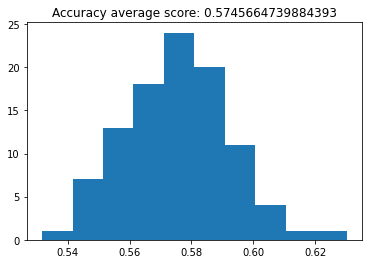

In [45]:
average_tree_score(Tree)

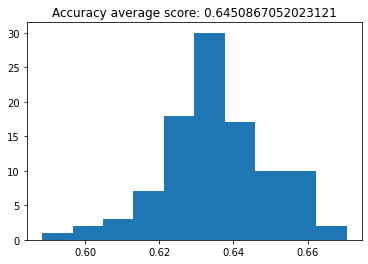

In [46]:
average_tree_score(Forest)

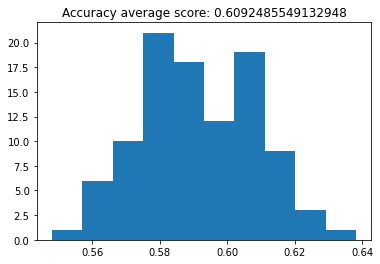

In [47]:
average_tree_score(knn)

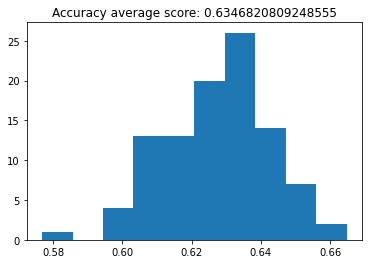

In [48]:
average_tree_score(gradboost)

##### Cross-validation

We use the features and see how the results match with the actual target.

In [49]:
def cross(classifier):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size)
    classifier.fit(X_train, np.array(y_train).ravel())    
    cv_scores = cross_val_score(classifier, features,  np.array(target).ravel(),cv=11)
    plt.hist(cv_scores)
    plt.title('Cross validation score: {}'.format(np.mean(cv_scores)))

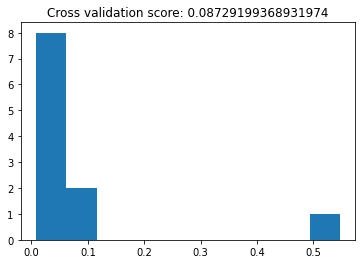

In [50]:
cross(Tree)

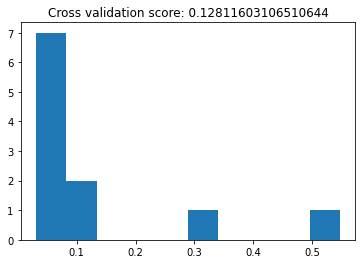

In [51]:
cross(Forest)

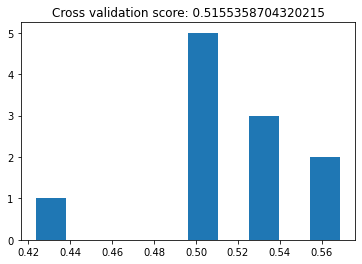

In [52]:
cross(knn)

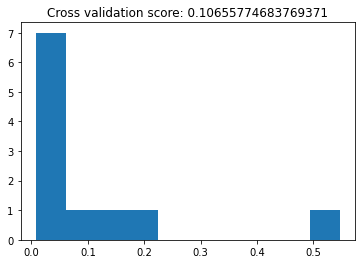

In [53]:
cross(gradboost)

After trying with just the integer variables we are going to make groups of the string variables and give them a number with the following functions:

#### 2º Attempt
[[ go back to the top ]](#Table-of-contents)

##### Features

In [54]:
label_enc=LabelEncoder()

label_0=df['id']
label_1=label_enc.fit_transform(df['category'])
label_2=df['n_dlcs']
label_3=df['n_expansions']
label_4=df['year']
label_5=df['follows']
label_6=label_enc.fit_transform(df['in_franchise'])
label_7=label_enc.fit_transform(df['genres'])
label_8=label_enc.fit_transform(df['companies'])
label_9=label_enc.fit_transform(df['platforms'])
label_10=label_enc.fit_transform(df['n_user_reviews'])

features=pd.DataFrame(list(zip(label_0,label_1,label_2,label_3,label_4,label_5,
                               label_6,label_7,label_8,label_9,label_10)),
                      columns=['id','category','n_dlcs','n_expansions','year',
                               'follows','in_franchise','genres','companies','platforms','n_user_reviews'])

In [55]:
features.head()

,id,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,n_user_reviews
0,1020,6,0,0,2013,1766,1,515,2994,733,545
1,1942,6,4,2,2015,1516,1,427,4141,780,544
2,472,6,3,0,2011,1046,0,427,491,669,543
3,72,6,3,0,2011,963,1,548,4056,229,542
4,71,6,0,0,2007,894,1,547,4054,230,541


In [56]:
target.head()

,user_rating
0,great
1,great
2,great
3,great
4,great


In [57]:
features_train,features_test,target_train,target_test = train_test_split(features,target,
                                                                         test_size=test_size,
                                                                         random_state=42)

#### Score

In [58]:
Tree=Tree.fit(features_train,target_train)
Tree.score(features_test,target_test)

0.63121387283237

In [59]:
Forest=Forest.fit(features_train,np.array(target_train).ravel())
Forest.score(features_test,target_test)

0.6890173410404624

In [60]:
knn=knn.fit(features_train,np.array(target_train).ravel())
knn.score(features_test,target_test)

0.5757225433526012

In [61]:
gradboost=gradboost.fit(features_train,np.array(target_train).ravel())
gradboost.score(features_test,target_test)

0.6485549132947976

##### Average tree score

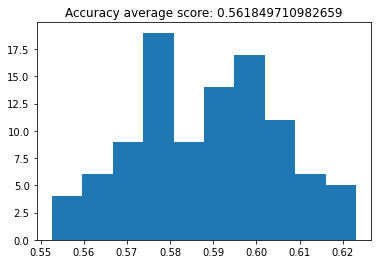

In [62]:
average_tree_score(Tree)

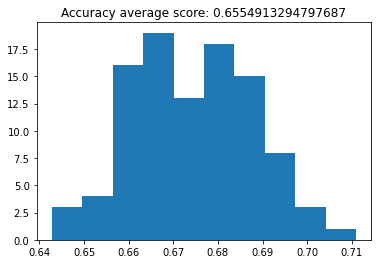

In [63]:
average_tree_score(Forest)

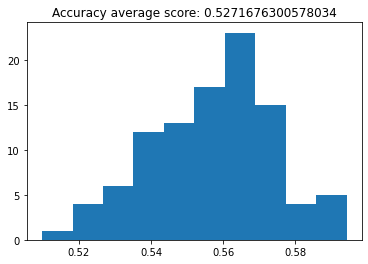

In [64]:
average_tree_score(knn)

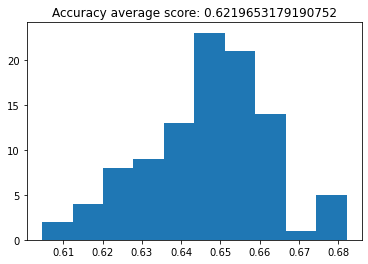

In [65]:
average_tree_score(gradboost)

##### Cross-validation



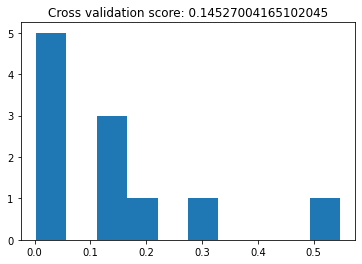

In [66]:
cross(Tree)

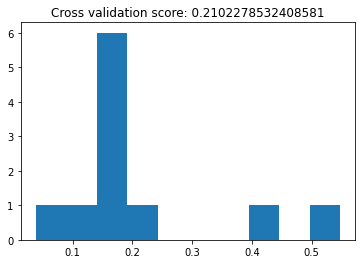

In [67]:
cross(Forest)

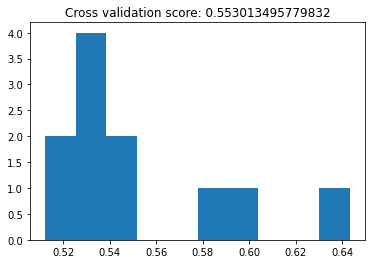

In [68]:
cross(knn)

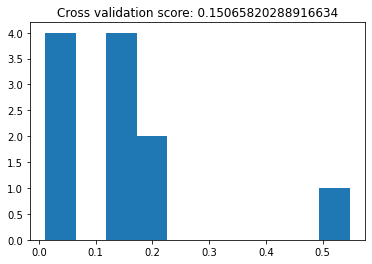

In [69]:
cross(gradboost)

#### 3º Attempt
[[ go back to the top ]](#Table-of-contents)

The cross-validation is a bit low so we are going to play around with the features variables in order to increase it.

We are going to start by removing the column 'n_user_reviews' because in the scatter plot graphic it shows possibility of overfitting. If we are right, the cross-validation should increase significantly.

##### Features

In [70]:
label_enc=LabelEncoder()

label_0=df['id']
label_1=label_enc.fit_transform(df['category'])
label_2=df['n_dlcs']
label_3=df['n_expansions']
label_4=df['year']
label_5=df['follows']
label_6=label_enc.fit_transform(df['in_franchise']) 
label_7=label_enc.fit_transform(df['genres'])
label_8=label_enc.fit_transform(df['companies'])
label_9=label_enc.fit_transform(df['platforms'])

features=pd.DataFrame(list(zip(label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9)),
                      columns=['id','category','n_dlcs','n_expansions','year',
                               'follows','in_franchise','genres','companies','platforms'])

In [71]:
features.head()

,id,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms
0,1020,6,0,0,2013,1766,1,515,2994,733
1,1942,6,4,2,2015,1516,1,427,4141,780
2,472,6,3,0,2011,1046,0,427,491,669
3,72,6,3,0,2011,963,1,548,4056,229
4,71,6,0,0,2007,894,1,547,4054,230


In [72]:
target.head()

,user_rating
0,great
1,great
2,great
3,great
4,great


In [73]:
features_train,features_test,target_train,target_test = train_test_split(features,target,
                                                                         test_size=test_size,
                                                                         random_state=42)

#### Score

In [74]:
Tree=Tree.fit(features_train,target_train)
Tree.score(features_test,target_test)

0.6208092485549133

In [75]:
Forest=Forest.fit(features_train,np.array(target_train).ravel())
Forest.score(features_test,target_test)

0.6820809248554913

In [76]:
knn=knn.fit(features_train,np.array(target_train).ravel())
knn.score(features_test,target_test)

0.5699421965317919

In [77]:
gradboost=gradboost.fit(features_train,np.array(target_train).ravel())
gradboost.score(features_test,target_test)

0.6462427745664739

##### Average tree score

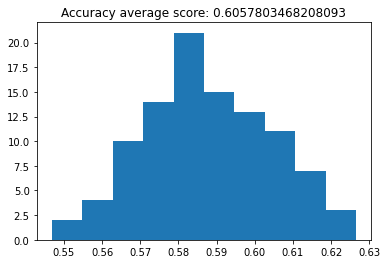

In [78]:
average_tree_score(Tree)

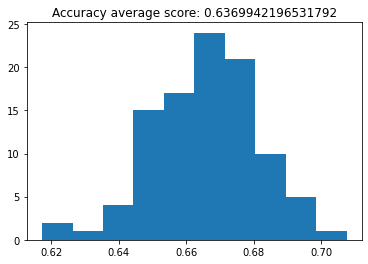

In [79]:
average_tree_score(Forest)

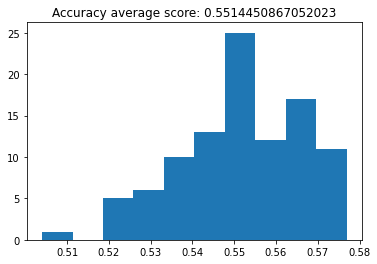

In [80]:
average_tree_score(knn)

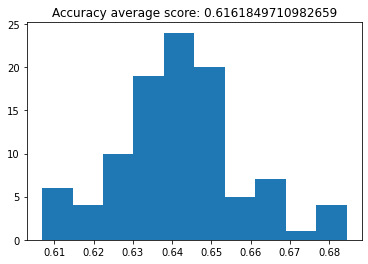

In [81]:
average_tree_score(gradboost)

##### Cross-validation

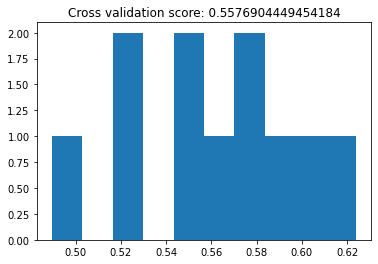

In [82]:
cross(Tree)

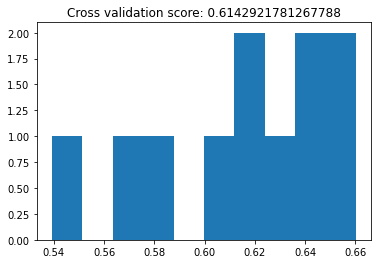

In [83]:
cross(Forest)

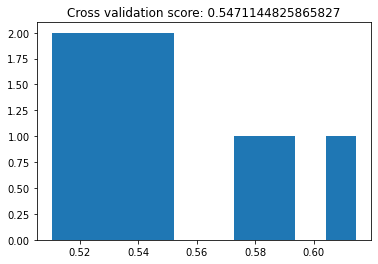

In [84]:
cross(knn)

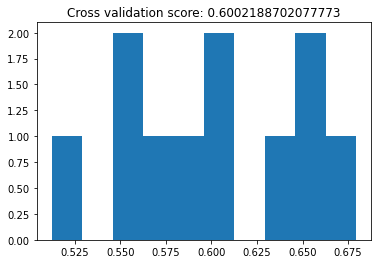

In [85]:
cross(gradboost)

Because the cross-validation came back up without the column 'n_user_reviews' we won't include it in further analysis.

### Tuning the parameters
[[ go back to the top ]](#Table-of-contents)

Now we have the best precision yet so let's tune the parameters of the decision tree creater so we can achieve an even better accuracy.

#### DecisionTreeClassifier

>Node:

In [86]:
tree_test = DecisionTreeClassifier(criterion='gini')
cv_scores = cross_val_score(tree_test, features, target,cv=11)
max = np.mean(cv_scores)
for i in range(2,10):
    tree_test = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=i)
    temp = np.mean(cross_val_score(tree_test, features, target,cv=11))
    if temp>max:
        node=i
        max=temp
node

4

>Depth:

In [87]:
tree_test = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=node) 
cv_scores = cross_val_score(tree_test, features, target,cv=11)
max = np.mean(cv_scores)
for i in range(2,10):
    tree_test = DecisionTreeClassifier(criterion='gini',max_depth=i,max_leaf_nodes=node)
    temp = np.mean(cross_val_score(tree_test, features, target,cv=11))
    if temp>max:
        depth=i
        max=temp
depth

2

In [88]:
final_tree = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=node,max_depth=depth)

#### RandomForestClassifier

>Node:

In [89]:
test = RandomForestClassifier(n_estimators=200)
cv_scores = cross_val_score(test, features, np.array(target).ravel(),cv=11)
max = np.mean(cv_scores)
for i in range(2,10):
    test = RandomForestClassifier(n_estimators=200, max_leaf_nodes=i)
    temp = np.mean(cross_val_score(test, features, np.array(target).ravel(),cv=11))
    if temp>max:
        node=i
        max=temp
node

4

>Depth:

In [90]:
test = RandomForestClassifier(n_estimators=200,max_leaf_nodes=node)  
cv_scores = cross_val_score(test, features, np.array(target).ravel(),cv=11)
max = np.mean(cv_scores)
for i in range(2,10):
    test = RandomForestClassifier(n_estimators=200,max_depth=i,max_leaf_nodes=node)
    temp = np.mean(cross_val_score(test, features, np.array(target).ravel(),cv=11))
    if temp>max:
        depth=i
        max=temp
depth

9

In [91]:
final_randomForest=RandomForestClassifier(n_estimators=200,max_depth=depth, max_leaf_nodes=node)

#### GradientBoostingClassifier

>Node:

In [92]:
test = GradientBoostingClassifier(n_estimators=20)
cv_scores = cross_val_score(test, features, np.array(target).ravel(),cv=11)
max = np.mean(cv_scores)
for i in range(2,10):
    test = GradientBoostingClassifier(n_estimators=20, max_leaf_nodes=i)
    temp = np.mean(cross_val_score(test, features, np.array(target).ravel(),cv=11))
    if temp>max:
        node=i
        max=temp
node

7

>Depth:

In [93]:
test = GradientBoostingClassifier(n_estimators=20,max_leaf_nodes=node)
cv_scores = cross_val_score(test, features, np.array(target).ravel(),cv=11)
max = np.mean(cv_scores)
for i in range(2,10):
    test = GradientBoostingClassifier(n_estimators=20,max_depth=i,max_leaf_nodes=node)
    temp = np.mean(cross_val_score(test, features, np.array(target).ravel(),cv=11))
    if temp>max:
        depth=i
        max=temp
depth

6

>Learning rate:

In [94]:
test = GradientBoostingClassifier(n_estimators=20, learning_rate=0.05,
                                      max_depth=depth, max_leaf_nodes=node)
test.fit(features_train, np.array(target_train).ravel())
max=test.score(features_test, target_test)
lr_list = [0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    test = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate,
                                      max_depth=depth, max_leaf_nodes=node)
    test.fit(features_train,np.array(target_train).ravel())
    temp=test.score(features_test, target_test)
    if temp>max:
        l_r=learning_rate
        max=temp
l_r

0.75

In [95]:
final_gradientBoost=GradientBoostingClassifier(n_estimators=20,learning_rate=l_r,max_depth=depth,max_leaf_nodes=node)

#### KNeighborsClassifier

>Number of neighbors:

In [96]:
test = KNeighborsClassifier(n_jobs=-1)
cv_scores = cross_val_score(test, features, np.array(target).ravel(),cv=11)
max = np.mean(cv_scores)
for i in range(2,15):
    test = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    temp = np.mean(cross_val_score(test, features, np.array(target).ravel(),cv=11))
    if temp>max:
        n=i
        max=temp       
n

3

In [97]:
final_knn=KNeighborsClassifier(n_neighbors=n,n_jobs=-1)

##### Final scores:

In [98]:
final_tree=final_tree.fit(features_train,target_train)
final_tree.score(features_test,target_test)

0.6358381502890174

In [99]:
final_randomForest=Forest.fit(features_train,np.array(target_train).ravel())
final_randomForest.score(features_test,target_test)

0.6867052023121387

In [100]:
final_knn=final_knn.fit(features_train,np.array(target_train).ravel())
final_knn.score(features_test,target_test)

0.5653179190751445

In [101]:
final_gradientBoost=final_gradientBoost.fit(features_train,np.array(target_train).ravel())
final_gradientBoost.score(features_test,target_test)

0.6786127167630058

##### Average final classifiers score:

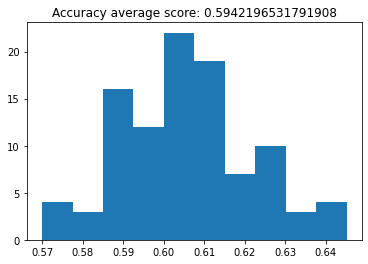

In [102]:
average_tree_score(final_tree)

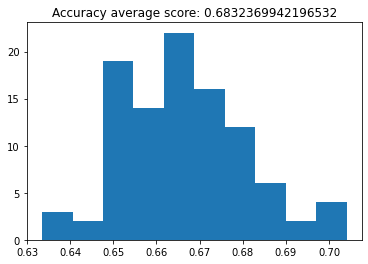

In [103]:
average_tree_score(final_randomForest)

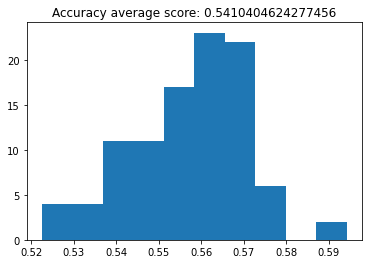

In [104]:
average_tree_score(final_knn)

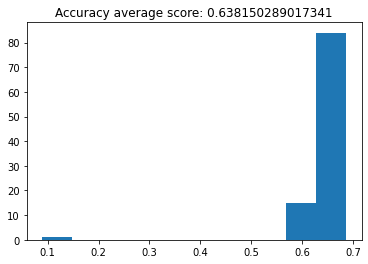

In [105]:
average_tree_score(final_gradientBoost)

##### Final cross-validation

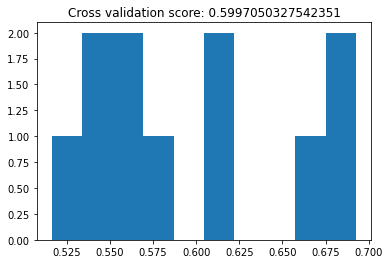

In [106]:
cross(final_tree)

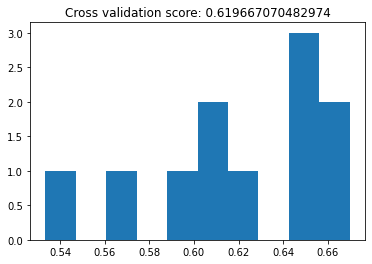

In [107]:
cross(final_randomForest)

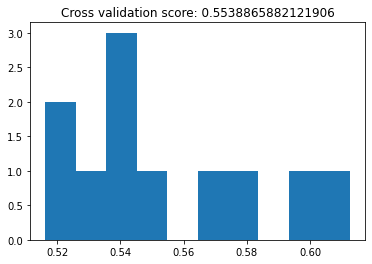

In [108]:
cross(final_knn)

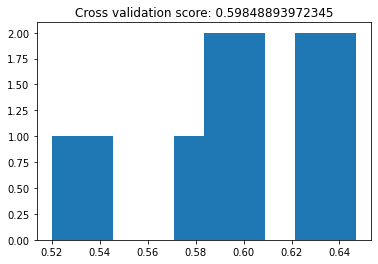

In [109]:
cross(final_gradientBoost)

Now we have achieved the best cross-validation.

In [110]:
def cross2(classifier):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size)
    classifier.fit(X_train, np.array(y_train).ravel())    
    return np.array(cross_val_score(classifier, features,  np.array(target).ravel(),cv=11))

C:\Users\guiva\AppData\Local\Temp\ipykernel_16132\370955761.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = rf_df.append(dt_df)
C:\Users\guiva\AppData\Local\Temp\ipykernel_16132\370955761.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df=all_df.append(knn_df)
C:\Users\guiva\AppData\Local\Temp\ipykernel_16132\370955761.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df=all_df.append(gb_df)


''

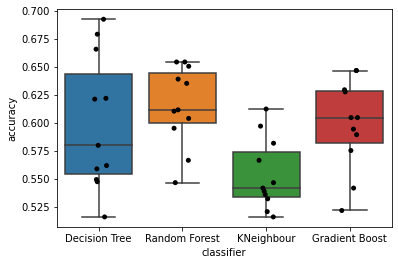

In [111]:
rf_df = pd.DataFrame({'accuracy': cross2(final_tree),'classifier': ['Decision Tree'] * 11})
dt_df = pd.DataFrame({'accuracy': cross2(final_randomForest),'classifier': ['Random Forest'] * 11})
knn_df = pd.DataFrame({'accuracy': cross2(final_knn),'classifier': ['KNeighbour'] * 11})
gb_df = pd.DataFrame({'accuracy': cross2(final_gradientBoost),'classifier': ['Gradient Boost'] * 11})

all_df = rf_df.append(dt_df)
all_df=all_df.append(knn_df)
all_df=all_df.append(gb_df)

sns.boxplot(x='classifier', y='accuracy', data=all_df)
sns.stripplot(x='classifier', y='accuracy', data=all_df, jitter=True, color='black')
;

##### Decision Tree

We can visualize the decision tree with [GraphViz](http://www.graphviz.org/) to see how it's making the classifications:

In [112]:
Source(tree.export_graphviz(final_tree, out_file=None, feature_names=features.columns))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

##### Random Forest

In [113]:
forest_graph=Source(tree.export_graphviz(final_randomForest.estimators_[199],
                                         out_file=None, feature_names=features.columns))
png = forest_graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png)

from IPython.display import Image
Image(png)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
#Source(tree.export_graphviz(final_randomForest.estimators_[199], out_file=None, feature_names=features.columns))

##### Gradient Boost
Example:
    
    tree number 17

In [ ]:
Source(tree.export_graphviz(final_gradientBoost.estimators_[17, 0] , out_file=None, feature_names=features.columns))

#### KNeighbors

## Percentage Comparison
[[ go back to the top ]](#Table-of-contents)

Now we created a function to estimate the percentage of what each game is classified as, according to our model:

In [ ]:
def percentage(classifier,real_stats):
    our_df=pd.DataFrame(df[['id','name']], columns = ['id','name','rating'])
    n=5761
    pred_column=[]*(n+1)
    for i in range(0,n):
        pred_column.append(classifier.predict(features.iloc[[i]]))
    pred_column=pd.DataFrame(pred_column, columns = ['rating'])
    our_df['rating']=pred_column['rating']
    n_rate = np.array([["great", 0],
                       ["good", 0],
                       ["medium", 0],
                       ["bad", 0]])
    for i in range(0,4):
        try:
            n_rate[i][1]=our_df['rating'].value_counts("")[i]
        except:
            n_rate[i][1]=0
    total=0
    for i in range(0,4):
        total+= int(n_rate[i][1])
    for i in range(0,4):
        n_rate[i][1]=round((100*int(n_rate[i][1]))/total, 2)
    stats=pd.DataFrame( columns = ['','Our Percentage:'])
    stats.at[0,''] = "Sum of  'great's:"
    stats.at[1,''] = "Sum of  'good's:"
    stats.at[2,''] = "Sum of  'medium's:"
    stats.at[3,''] = "Sum of  'bad's:"
    for i in range(0,4):
        stats.at[i,'Our Percentage:'] = str(n_rate[i][1])+"%"
    stats.at[0,'Real percentage:'] = real_stats.at[0,'Percentage:']
    stats.at[1,'Real percentage:'] = real_stats.at[1,'Percentage:']
    stats.at[2,'Real percentage:'] = real_stats.at[2,'Percentage:']
    stats.at[3,'Real percentage:'] = real_stats.at[3,'Percentage:']
    return stats

In [ ]:
percentage(final_tree,real_stats)

In [ ]:
percentage(final_randomForest,real_stats)

In [ ]:
percentage(final_knn,real_stats)

In [ ]:
percentage(final_gradientBoost,real_stats)

#### GridSearch:

##### DecisionTreeClassifier

In [ ]:
Decision_Tree_Classifier = DecisionTreeClassifier(criterion='gini')

parameter_grid = {'max_depth': range(2,10),
                  'max_leaf_nodes':range(2,50),             
                  'max_features': range(2,10)}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(Decision_Tree_Classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(features, target)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

In [ ]:
grid_decision_Tree=grid_search.best_estimator_

In [ ]:
#cross(grid_decision_Tree)

##### RandomForestClassifier

In [ ]:
random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'max_features': range(2,10),
                  'max_depth': range(2,10),
                  'max_leaf_nodes':range(2,50)}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(features, np.array(target).ravel())
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

In [ ]:
grid_Rforest=grid_search.best_estimator_

In [ ]:
#cross(grid_Rforest)

##### GradientBoostingClassifier

In [ ]:
Gradient_Boosting_Classifier = GradientBoostingClassifier(criterion='gini')

parameter_grid = {'max_depth': range(2,10),
                  'learning_rate':[0.075, 0.1, 0.25, 0.5, 0.75, 1],
                  'max_leaf_nodes':range(2,50),             
                  'max_features': range(2,10)}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(Gradient_Boosting_Classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(features, np.array(target).ravel())
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

In [ ]:
grid_gradientBoost=grid_search.best_estimator_

In [ ]:
#cross(grid_gradientBoost)

##### KNeighborsClassifier

In [ ]:
KNeighbors_Classifier = KNeighborsClassifier()

parameter_grid = {'n_neighbors':range(2,20)}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(KNeighbors_Classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(features, np.array(target).ravel())
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

In [ ]:
grid_Knn=grid_search.best_estimator_

In [ ]:
#cross(grid_Knn)

## Conclusion
[[ go back to the top ]](#Table-of-contents)

First we had only implemented the Decision tree classifier and under a minute the code had all ran, but after we implemented the other four, the program run-time increased a lot.

We used algorithms that we created to test the variables because using gridsearch took a lot longer to load. And running our whole program took already some time. Nevertheless we included the grid search algorithm here just above the conclusion just so it would be here.

As shown the cross-validation values stagnate around approximately 60% in every classifier but with the `percentage()` function we can see some other useful information. After looking at the output of that respective function, with each classifier as a parameter, we can see that the one with the percentage closer to the `real_stats` from the dataset is the same as the one with the highest cross-validation, though not by far from the Gradient Boost and the Decision Tree it's the Random Forest. 

The kneighbourClassifier was the one with the least cross-validation but still predicted some ammount of 'medium's and 'bad's. On the other hand the decision tree classifier hada cross-validation score higher but got a larger error when comparing with the `real_stats`. Not even predicting one 'medium' nor one 'bad'.